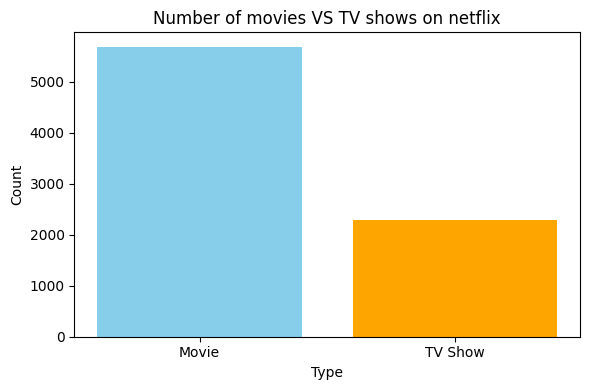

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("netflix_titles.csv")

df =df.dropna(subset = ['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title("Number of movies VS TV shows on netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Movie_VS_TVshows.png")
plt.show()



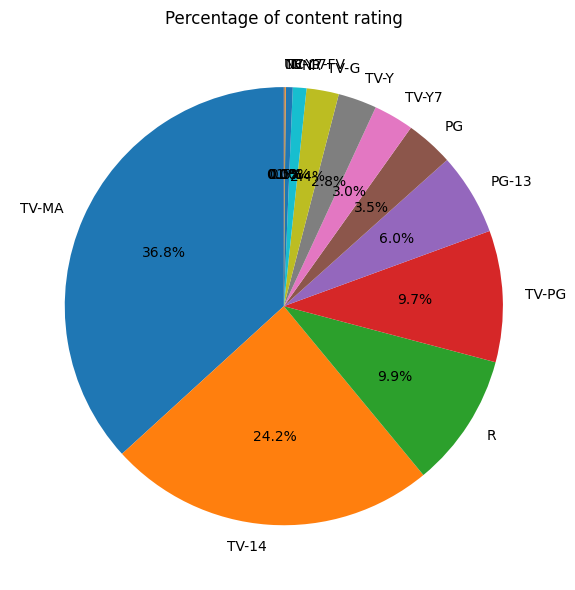

In [2]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Percentage of content rating")
plt.tight_layout()
plt.savefig("content_rating_pie.png")
plt.show()


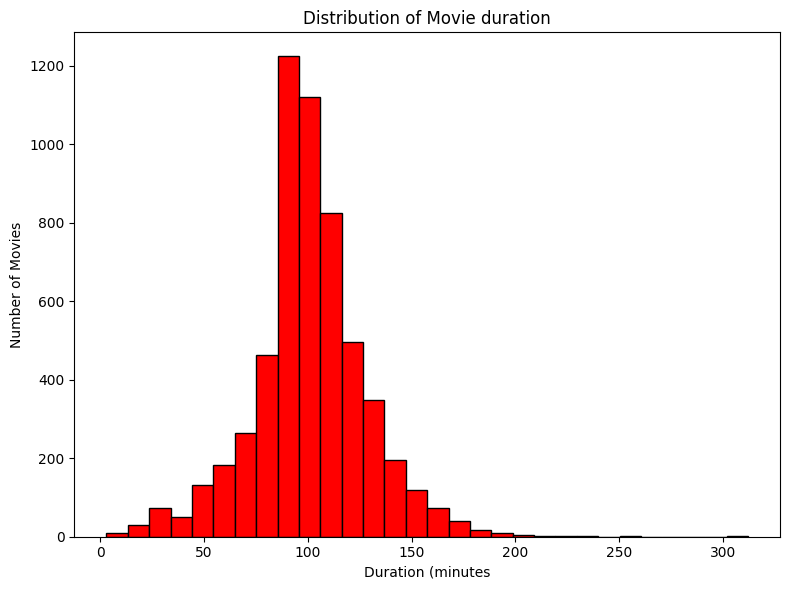

In [7]:
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int']= movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color="red",edgecolor="black")
plt.title("Distribution of Movie duration")
plt.xlabel("Duration (minutes")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("Movie_durartion_histogarm.png")
plt.show()

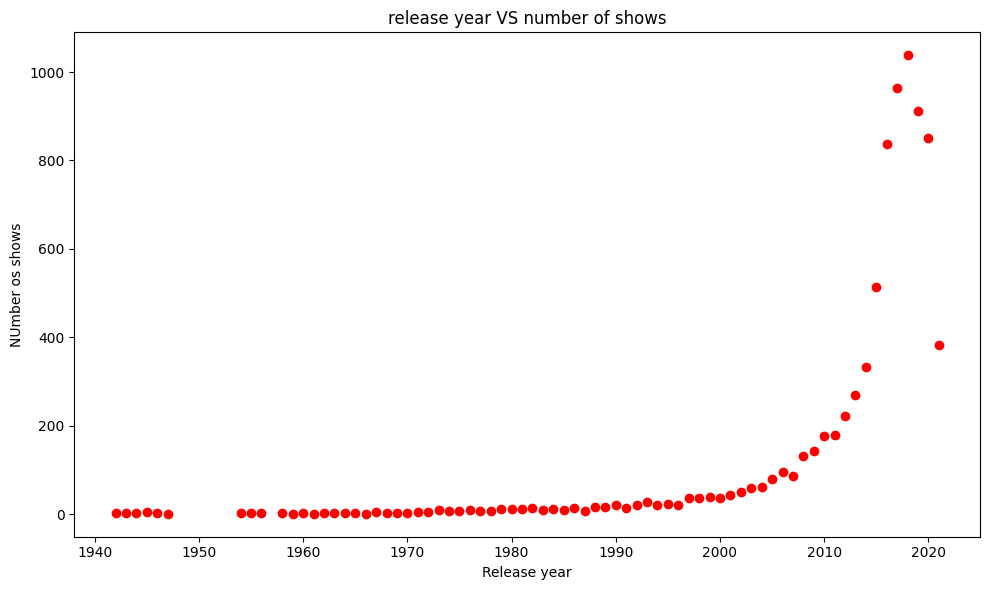

In [4]:
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index,release_counts.values,color="red")
plt.title("release year VS number of shows")
plt.xlabel("Release year")
plt.ylabel("NUmber os shows")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

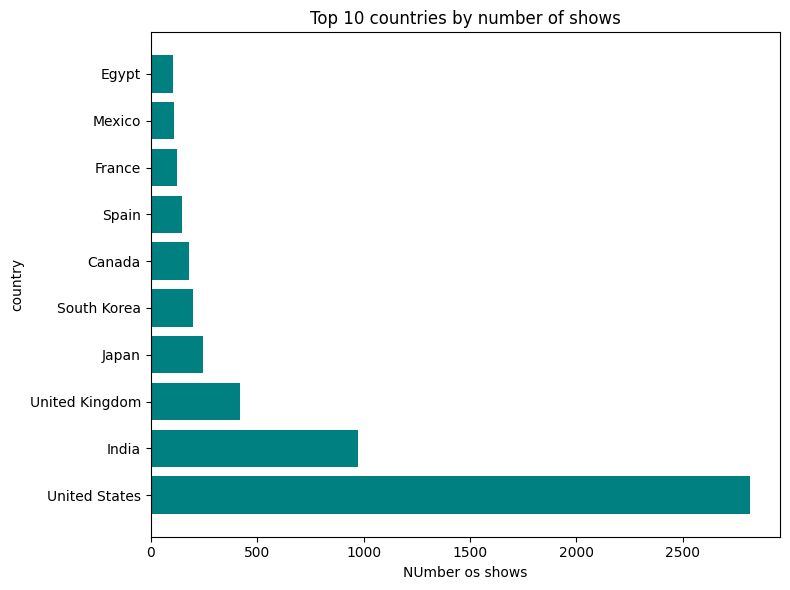

In [5]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color="teal")
plt.title("Top 10 countries by number of shows")
plt.xlabel("NUmber os shows")
plt.ylabel("country")
plt.tight_layout()
plt.savefig("top10_countries.png.png")
plt.show()

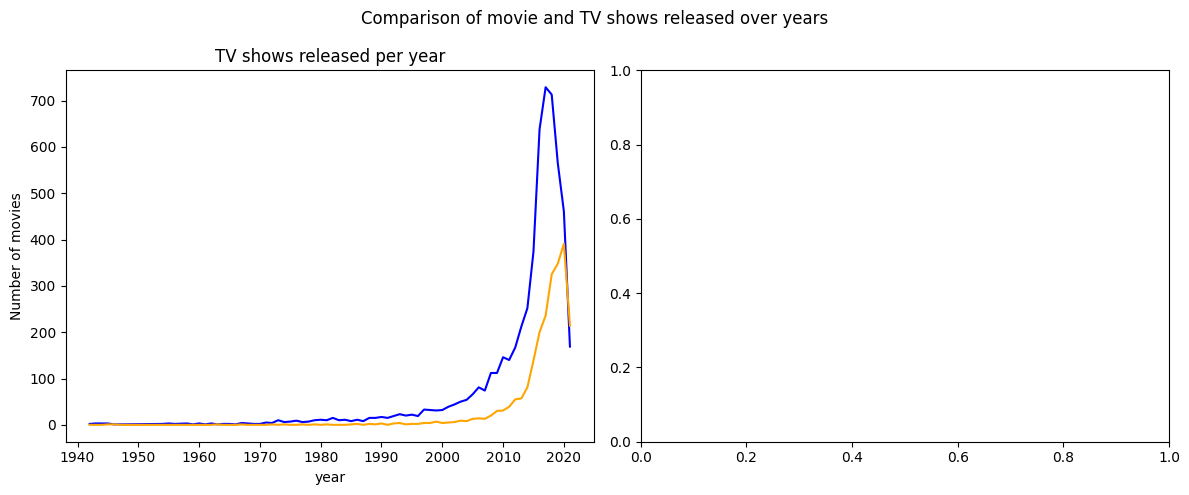

In [6]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(content_by_year.index,content_by_year["Movie"],color="blue")
ax[0].set_title("Movies released per year")
ax[0].set_xlabel("year")
ax[0].set_ylabel("Number of movies")

ax[0].plot(content_by_year.index,content_by_year["TV Show"],color="orange")
ax[0].set_title("TV shows released per year")
ax[0].set_xlabel("year")
ax[0].set_ylabel("Number of movies")


fig.suptitle("Comparison of movie and TV shows released over years")
plt.tight_layout()
plt.savefig("movies_tv_shows_comparison.png")
plt.show()